In [1]:
# %matplotlib Qt5

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from siriuspy.devices import DVF

from mathphys import imgproc as images


def create_gauss1d():
    gauss1d, indcs1d = images.FitGaussian.generate_gaussian_1d(
        indcs=1280, sigma=50, mean=600, amplitude=10)
    return gauss1d, indcs1d

def create_gauss1dsat():
    gauss1dsat, indcs1d = images.FitGaussian.generate_gaussian_1d(
        indcs=1024, sigma=50, mean=500, amplitude=300, saturation_threshold=images.FitGaussian.SATURATION_8BITS)
    return gauss1dsat, indcs1d

def create_gauss2d(indcs=(1280, 1024), sigma=(50, 20), mean=(600,500), amplitude=254, rand_amplitude=0, angle=0, offset=0):
    gauss2d, indcsx2d, indcsy2d = images.FitGaussian.generate_gaussian_2d(
        indcs=indcs, sigma=sigma, mean=mean, amplitude=amplitude, offset=offset, rand_amplitude=rand_amplitude, angle=angle)
    return gauss2d, indcsx2d, indcsy2d

def create_gauss2dsat():
    gauss2dsat, indcsx2d, indcsy2d = images.FitGaussian.generate_gaussian_2d(
        indcs=(1280, 1024), sigma=(50, 20), mean=(600,500), amplitude=250,
        saturation_threshold=100)
    return gauss2dsat, indcsx2d, indcsy2d

# DVF

In [2]:
dvf = DVF(DVF.DEVICES.CAX_DVF2)

In [3]:
dvf.pvnames

{'CAX:B:BASLER01:CC1:ColorModeOut',
 'CAX:B:BASLER01:CC1:ColorModeOut_RBV',
 'CAX:B:BASLER01:CC1:EnableCallbacks',
 'CAX:B:BASLER01:CC1:EnableCallbacks_RBV',
 'CAX:B:BASLER01:CC1:FalseColor',
 'CAX:B:BASLER01:CC1:FalseColor_RBV',
 'CAX:B:BASLER01:DimFei1:EnableCallbacks',
 'CAX:B:BASLER01:DimFei1:EnableCallbacks_RBV',
 'CAX:B:BASLER01:HDF1:EnableCallbacks',
 'CAX:B:BASLER01:HDF1:EnableCallbacks_RBV',
 'CAX:B:BASLER01:Over1:EnableCallbacks',
 'CAX:B:BASLER01:Over1:EnableCallbacks_RBV',
 'CAX:B:BASLER01:Trans1:EnableCallbacks',
 'CAX:B:BASLER01:Trans1:EnableCallbacks_RBV',
 'CAX:B:BASLER01:cam1:Acquire',
 'CAX:B:BASLER01:cam1:AcquirePeriod',
 'CAX:B:BASLER01:cam1:AcquirePeriod_RBV',
 'CAX:B:BASLER01:cam1:AcquireTime',
 'CAX:B:BASLER01:cam1:AcquireTime_RBV',
 'CAX:B:BASLER01:cam1:Acquire_RBV',
 'CAX:B:BASLER01:cam1:ArrayCallbacks',
 'CAX:B:BASLER01:cam1:ArrayCallbacks_RBV',
 'CAX:B:BASLER01:cam1:ImageMode',
 'CAX:B:BASLER01:cam1:ImageMode_RBV',
 'CAX:B:BASLER01:ffmstream1:EnableCallbacks'

In [4]:
dvf.connected

True

In [5]:
dvf.cmd_acquire_on()

True

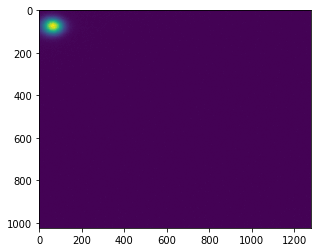

In [10]:
plt.imshow(dvf.image)

In [7]:
data = dvf.image

# CurveFitGauss

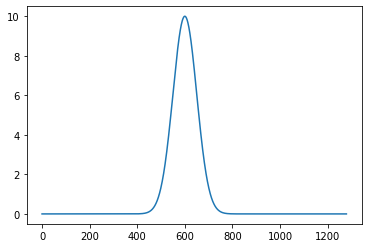

In [6]:
# generate 1D gaussian curve and normalize it

gauss1d, indcs1d = create_gauss1d()
plt.plot(indcs1d, gauss1d)

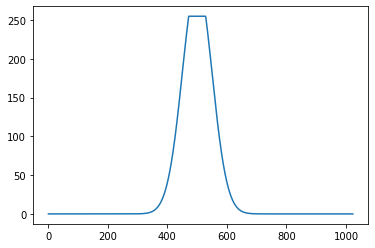

In [7]:
# generate saturated 1D gaussian curve and normalize it

gauss1dsat, indcs1d = create_gauss1dsat()
plt.plot(indcs1d, gauss1dsat)

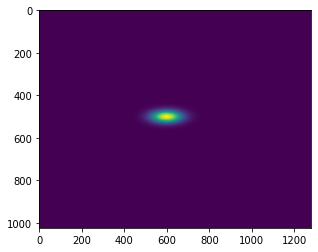

In [8]:
# generate 2D gaussian curve and normalize it

gauss2d, indcsx2d, indcsy2d = create_gauss2d()
plt.imshow(gauss2d)

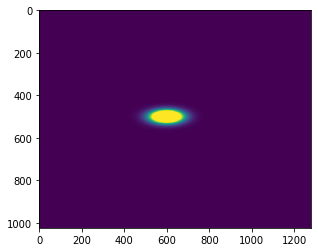

In [9]:
# generate saturated 2D gaussian curve and normalize it

gauss2dsat, indcsx2d, indcsy2d = create_gauss2dsat()
plt.imshow(gauss2dsat)

In [6]:
%timeit data = images.FitGaussian.gaussian(np.arange(1280), sigma=50, mean=500, amplitude=10, offset=0)

27 µs ± 206 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [7]:
%timeit gauss1d, indcs1d = images.FitGaussian.generate_gaussian_1d(indcs=1280, sigma=50, mean=500, amplitude=10)

40.4 µs ± 1.18 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [8]:
%timeit gauss2dsat, indcsx2d, indcsy2d = images.FitGaussian.generate_gaussian_2d(indcs=(1280, 1024), sigma=(50, 20), mean=(600,500), amplitude=250, saturation_threshold=100)

34.3 ms ± 219 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Image1D

size            : 1280
intensity_min   : 9.005079551673561e-40
intensity_max   : 10.0
intensity_avg   : 0.9791516697777347
intensity_sum   : 1253.3141373155004
saturation_val  : 255
saturated       : False


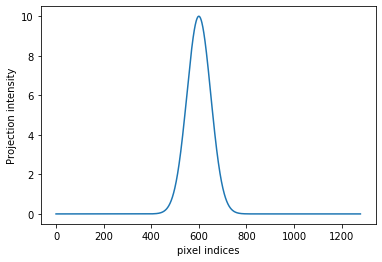

In [10]:
gauss1d, indcs1d = create_gauss1d()

data = gauss1d

img = images.Image1D(data=data)
img.imshow()
print(img)

size            : 1024
intensity_min   : 5.2323186718338715e-22
intensity_max   : 255.0
intensity_avg   : 35.07491375352191
intensity_sum   : 35916.71168360644
saturation_val  : 255
saturated       : True


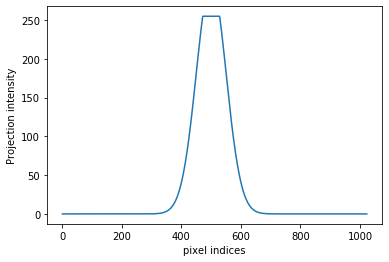

In [11]:
gauss1dsat, indcs1d = create_gauss1dsat()

data = gauss1dsat

img = images.Image1D(data=data)
img.imshow()
print(img)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ba4deac88>)

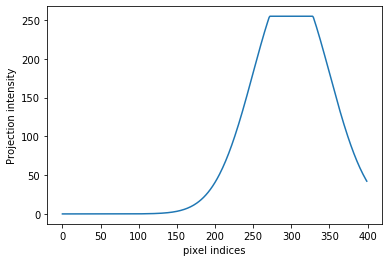

In [12]:
img.imshow(crop=[200,600])

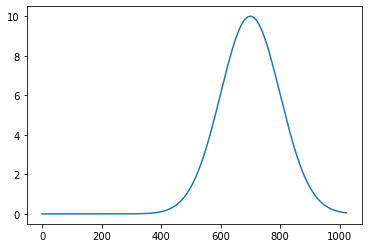

In [13]:
data, indcs = img.generate_gaussian_1d(sigma=100, mean=700, amplitude=10)
plt.plot(indcs, data)

In [13]:
%timeit img = images.Image1D(data=gauss1d)

6.43 µs ± 77 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Image1D_ROI

size            : 1280
intensity_min   : 9.005079551673561e-40
intensity_max   : 10.0
intensity_avg   : 0.9791516697777347
intensity_sum   : 1253.3141373155004
saturation_val  : 255
saturated       : False
roi             : [0, 1280]
roi_center      : 600
roi_fwhm        : 116


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ba4d2cb70>)

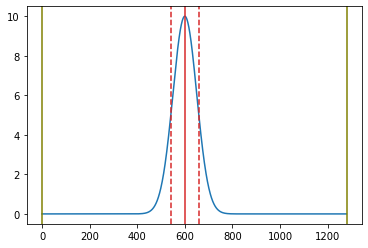

In [14]:
gauss1d, indcs1d = create_gauss1d()

data = gauss1d

img = images.Image1D_ROI(data=data)
print(img)
img.imshow()

size            : 1280
intensity_min   : 9.005079551673561e-40
intensity_max   : 10.0
intensity_avg   : 0.9791516697777347
intensity_sum   : 1253.3141373155004
saturation_val  : 255
saturated       : False
roi             : [484, 716]
roi_center      : 600
roi_fwhm        : 116


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ba4ca47b8>)

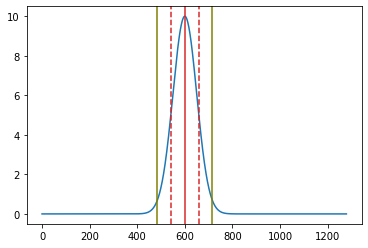

In [15]:
img.update_roi_with_fwhm()
print(img)
img.imshow()

In [16]:
%timeit img = images.Image1D_ROI(data=data)

30.2 µs ± 451 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
%timeit img.create_trimmed()

27 µs ± 97.7 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Image2D

sizey           : 1024
sizex           : 1280
intensity_min   : 7.398643383910336e-187
intensity_max   : 254.0
intensity_avg   : 1.217597250384227
intensity_sum   : 1595929.068023614
saturation_val  : 255
saturated       : False


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff30465f400>)

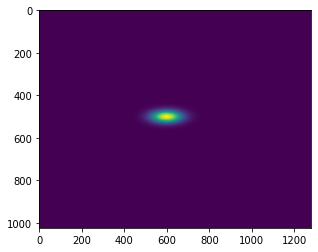

In [2]:
gauss2d, indcsx2d, indcsy2d = create_gauss2d()

# data = dvf.image
data = gauss2d

img = images.Image2D(data=data)
print(img)
img.imshow()

sizey           : 1024
sizex           : 1280
intensity_min   : 7.427771901169825e-187
intensity_max   : 255.0
intensity_avg   : 1.2223909403463704
intensity_sum   : 1602212.2533307946
saturation_val  : 80
saturated       : True


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff2561dd6a0>)

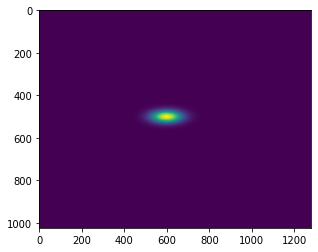

In [3]:
# saturate image for testing 

gauss2dsat, indcsx2d, indcsy2d = create_gauss2d(amplitude=255)

data = gauss2dsat

img = images.Image2D(data=gauss2dsat, saturation_threshold=80)
print(img)
img.imshow()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff2561cc7b8>)

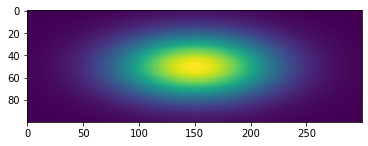

In [4]:
img.imshow(cropx=[450,750], cropy=[450,550])

In [5]:
img.is_saturated

True

In [13]:
# teste intensity threshold

print(img.intensity_max)
print(img.is_with_image)
img.intensity_threshold = 300
print(img.is_with_image)

img = images.Image2D(data=gauss2dsat, intensity_threshold=300)
print(img.is_with_image)

255.0
False
False
False


False


In [6]:
%timeit img = images.Image2D(data=data)

898 µs ± 8.73 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [23]:
%timeit img.intensity_min

378 µs ± 2.07 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [24]:
%timeit img.intensity_sum

356 µs ± 5.46 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [25]:
%timeit img.is_saturated

112 ns ± 0.571 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


# Image2D_ROI

sizey           : 1024
sizex           : 1280
intensity_min   : 7.398643383910336e-187
intensity_max   : 254.0
intensity_avg   : 1.217597250384227
intensity_sum   : 1595929.068023614
saturation_val  : 255
saturated       : False
--- projx ---
size            : 1280
intensity_min   : 1.1466772605919399e-36
intensity_max   : 12733.671635125478
intensity_avg   : 1246.819584393449
intensity_sum   : 1595929.0680236148
saturation_val  : 255
saturated       : True
roi             : [0, 1280]
roi_center      : 600
roi_fwhm        : 116
--- projy ---
size            : 1024
intensity_min   : 1.0297326410944403e-144
intensity_max   : 31834.179087813704
intensity_avg   : 1558.5244804918116
intensity_sum   : 1595929.068023615
saturation_val  : 255
saturated       : True
roi             : [0, 1024]
roi_center      : 500
roi_fwhm        : 46


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2b08fb0ef0>)

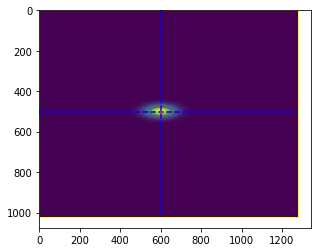

In [26]:
gauss2d, indcsx2d, indcsy2d = create_gauss2d()

# data = dvf.image
data = gauss2d

img = images.Image2D_ROI(data=data)
print(img)
img.imshow()

sizey           : 1024
sizex           : 1280
intensity_min   : 7.398643383910336e-187
intensity_max   : 254.0
intensity_avg   : 1.217597250384227
intensity_sum   : 1595929.068023614
saturation_val  : 255
saturated       : False
--- projx ---
size            : 1280
intensity_min   : 1.1466772605919399e-36
intensity_max   : 12733.671635125478
intensity_avg   : 1246.819584393449
intensity_sum   : 1595929.0680236148
saturation_val  : 255
saturated       : True
roi             : [484, 716]
roi_center      : 600
roi_fwhm        : 116
--- projy ---
size            : 1024
intensity_min   : 1.0297326410944403e-144
intensity_max   : 31834.179087813704
intensity_avg   : 1558.5244804918116
intensity_sum   : 1595929.068023615
saturation_val  : 255
saturated       : True
roi             : [454, 546]
roi_center      : 500
roi_fwhm        : 46


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2b08f2ccf8>)

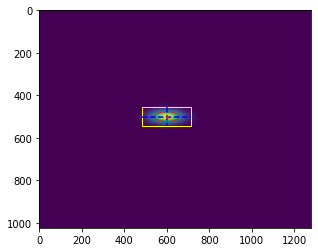

In [27]:
img.update_roi_with_fwhm()
print(img)
img.imshow()

In [28]:
x0, y0 = int(img.imagex.roi_center), int(img.imagey.roi_center)
sx, sy = int(1.0*img.imagex.roi_fwhm), int(1.0*img.imagey.roi_fwhm)
coef = 2.0
roix = [int(x0 - coef*sx), int(x0 + coef*sx)]
roiy = [int(y0 - coef*sy), int(y0 + coef*sy)]
img.roi = [roix, roiy]

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2b08f151d0>)

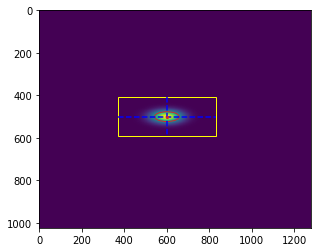

In [29]:
img.imshow()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2b08e8b6a0>)

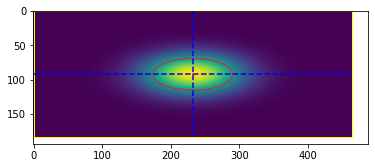

In [30]:
img.imshow(cropx=img.roix, cropy=img.roiy)

In [31]:
print(img)

sizey           : 1024
sizex           : 1280
intensity_min   : 7.398643383910336e-187
intensity_max   : 254.0
intensity_avg   : 1.217597250384227
intensity_sum   : 1595929.068023614
saturation_val  : 255
saturated       : False
--- projx ---
size            : 1280
intensity_min   : 1.1466772605919399e-36
intensity_max   : 12733.671635125478
intensity_avg   : 1246.819584393449
intensity_sum   : 1595929.0680236148
saturation_val  : 255
saturated       : True
roi             : [368, 832]
roi_center      : 600
roi_fwhm        : 116
--- projy ---
size            : 1024
intensity_min   : 1.0297326410944403e-144
intensity_max   : 31834.179087813704
intensity_avg   : 1558.5244804918116
intensity_sum   : 1595929.068023615
saturation_val  : 255
saturated       : True
roi             : [408, 592]
roi_center      : 500
roi_fwhm        : 46


In [39]:
%timeit img = images.Image2D_ROI(data)

1.64 ms ± 18.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [40]:
%timeit img.create_trimmed()

202 µs ± 1.16 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Image2D_CMom

In [8]:
# data = dvf.image
gauss2d, indcsx2d, indcsy2d = create_gauss2d(angle=20)
data = dvf.image
img = images.Image2D_CMom(data)

In [9]:
print(img)

sizey           : 1024
sizex           : 1280
intensity_min   : 0
intensity_max   : 26
intensity_avg   : 1.0501838684082032
intensity_sum   : 1376497
saturation_val  : 255
saturated       : False
--- projx ---
size            : 1280
intensity_min   : 932
intensity_max   : 1967
intensity_avg   : 1075.38828125
intensity_sum   : 1376497
saturation_val  : 255
saturated       : True
roi             : [0, 1280]
roi_center      : 490
roi_fwhm        : 88
--- projy ---
size            : 1024
intensity_min   : 1106
intensity_max   : 3472
intensity_avg   : 1344.2353515625
intensity_sum   : 1376497
saturation_val  : 255
saturated       : True
roi             : [0, 1024]
roi_center      : 279
roi_fwhm        : 37
--- cmom ---
cmomx           : 625.4647739878837
cmomy           : 488.9214716777443
cmomxx          : 135189.9931214856
cmomyy          : 92768.23017697106
cmomxy          : 4646.167833922916


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

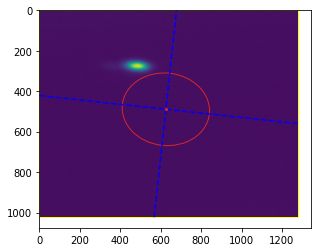

In [10]:
img.imshow()

In [6]:
img.roix = [0, 1000]
img.roiy = [400, 800]

sizey           : 1024
sizex           : 1280
intensity_min   : 9.605912733632567e-261
intensity_max   : 255.0
intensity_avg   : 1.2223909403463709
intensity_sum   : 1602212.253330795
saturated       : False
roiy            : [400, 800]
roix            : [0, 1000]
roiy_center     : 600
roix_center     : 500
roiy_fwhm       : 50
roix_fwhm       : 116
roi_meanx       : 500.00000000000006
roi_meany       : 600.0
roi_sigmax      : 98.79365048279605
roi_sigmay      : 43.07961769713597
roi_angle       : -1.5254750742642278


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0d07efea20>)

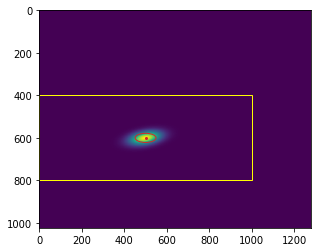

In [7]:
print(img)
img.imshow()

In [10]:
%timeit img._calc_cmom1()

17.6 µs ± 108 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [11]:
%timeit img.calc_central_moment(2, 0)

9.98 ms ± 19.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%timeit img._update_image_roi()

30.8 ms ± 200 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Image1D_Fit

In [9]:
gauss1d, indcs1d = create_gauss1d()

data = gauss1d

img = images.Image1D_Fit(data=data, roi=[100, 1000])
print(img)
img.imshow()

size            : 1280
intensity_min   : 9.005079551673561e-40
intensity_max   : 10.0
intensity_avg   : 0.9791516697777347
intensity_sum   : 1253.3141373155004
saturation_val  : 255
saturated       : False
roi             : [100, 1000]
roi_center      : 600
roi_fwhm        : 116
roi_amplitude   : 10.000000000000096
roi_mean        : 600.0
roi_sigma       : 50.0
roi_fit_err     : 9.594863807312107e-13 %


(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd0a40df908>)

size            : 1280
intensity_min   : 9.005079551673561e-40
intensity_max   : 10.0
intensity_avg   : 0.9791516697777347
intensity_sum   : 1253.3141373155004
saturation_val  : 255
saturated       : False
roi             : [484, 716]
roi_center      : 600
roi_fwhm        : 116
roi_amplitude   : 10.000000000000007
roi_mean        : 600.0
roi_sigma       : 49.99999999999998
roi_fit_err     : 5.940599195209335e-14 %


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f35de6cba90>)

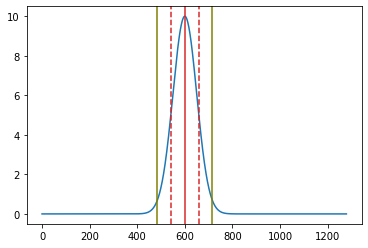

In [42]:
img.update_roi_with_fwhm(fwhm_factor=2)
print(img)
img.imshow()

5.940599195209335e-14


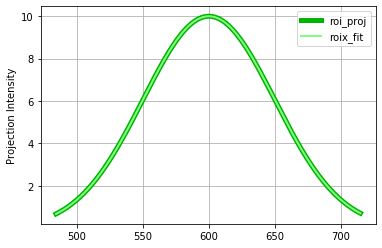

In [43]:
img.plot_projection()
print(img.roi_fit_error)

In [44]:
%timeit img = images.Image1D_Fit(data=data)

579 µs ± 1.73 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Image2D_Fit (Scipy fit)

In [2]:
dvf = DVF(DVF.DEVICES.CAX_DVF2)

gauss2d, indcsx2d, indcsy2d = create_gauss2d(amplitude=200, rand_amplitude=0, angle=0)

# data = dvf.image
data = gauss2d

sfg = images.FitGaussianScipy()

img = images.Image2D_Fit(data=data, fitgauss=sfg)
# print(img)
img.imshow()
img.plot_projections()

# Test angle fitting algorithm

In [5]:
def calc_angle_fit(img, plot=False):
    
    if plot:
        print(img.fity.roi_mean)
        print(img.fity.roi_sigma)

    yn = int(img.fity.roi_mean - 1 * img.fity.roi_sigma )
    y0 = int(img.fity.roi_mean - 0 * img.fity.roi_sigma )
    yp = int(img.fity.roi_mean + 1 * img.fity.roi_sigma )

    datan = img.data[yn,:]
    data0 = img.data[y0,:]
    datap = img.data[yp,:]
    
    if plot:
        plt.plot(datan)
        plt.plot(data0)
        plt.plot(datap)

    fitn = images.Image1D_Fit(data=datan, curve_fit=sfg)
    fit0 = images.Image1D_Fit(data=data0, curve_fit=sfg)
    fitp = images.Image1D_Fit(data=datap, curve_fit=sfg)

    if plot:
        print(fitn.roi_mean, yn)
        print(fit0.roi_mean, y0)
        print(fitp.roi_mean, yp)

    
def calc_angle_roi_orig(img, plot=False):

    if plot:
        print(img.fitx.roi_mean)
        print(img.fitx.roi_sigma)

    xn = int(img.fitx.roi_mean - 3 * img.fitx.roi_sigma )
    x0 = int(img.fitx.roi_mean - 0 * img.fitx.roi_sigma )
    xp = int(img.fitx.roi_mean + 3 * img.fitx.roi_sigma )

    datan = img.data[:, xn]
    data0 = img.data[:, x0]
    datap = img.data[:, xp]

    if plot:
        plt.plot(datan)
        plt.plot(data0)
        plt.plot(datap)

    fitn = images.Image1D_ROI(data=datan)
    fit0 = images.Image1D_ROI(data=data0)
    fitp = images.Image1D_ROI(data=datap)
    yn = fitn.roi_center
    y0 = fit0.roi_center
    yp = fitp.roi_center
    
    if plot:
        print(xn, yn)
        print(x0, y0)
        print(xp, yp)
        
    vx = [xn, x0, xp]
    vy = [yn, y0, yp]
    pfit = np.polyfit(vx, vy, 1)
    angle = - np.arctan(pfit[0]) # sign due to direction of vertical pixel increase
    if plot:
        print('angle: ', angle * 180 / np.pi)
        
def calc_angle_roi(img, plot=False):

    if plot:
        print(img.fitx.roi_mean)
        print(img.fitx.roi_sigma)

    cx, sx = img.fitx.roi_mean, img.fitx.roi_sigma
    vx = np.linspace(cx - 3*sx, cx + 3*sx, 5)
    vx = list(set([int(val) for val in vx]))
    vx = np.sort(vx)
    
    images1droi = [images.Image1D_ROI(data=img.data[:, val]) for val in vx]
    vy = [image.roi_center for image in images1droi]
    
    if plot:
        for image in images1droi:
            plt.plot(image.data)
        plt.show()
    
    if plot:
        for x_, y_ in zip(vx, vy):
            print(x_, y_)
        plt.plot(vx, vy)
        plt.show()
    
    
    pfit = np.polyfit(vx, vy, 1)
    angle = - np.arctan(pfit[0]) # sign due to direction of vertical pixel increase
    if plot:
        print('angle: ', angle * 180 / np.pi)

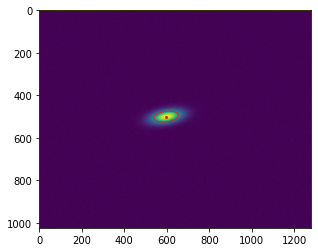

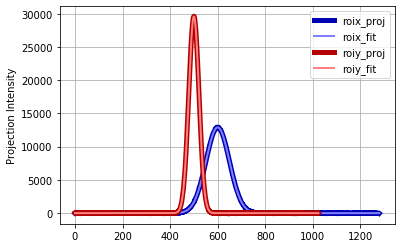

In [7]:
# dvf = DVF(DVF.DEVICES.CAX_DVF2)

gauss2d, *_ = create_gauss2d(
    indcs=(1280, 1024), sigma=(50, 20), mean=(600,500), amplitude=254,
    rand_amplitude=3, angle=10, offset=0)

# data = dvf.image
data = gauss2d

sfg = images.FitGaussianScipy()

img = images.Image2D_Fit(data=data, curve_fit=sfg, roix=None)
# print(img)
img.imshow()
img.plot_projections()

In [15]:
img.calc_angle_with_roi(sigma_factor=2, nrpts=5)

7.853217577731981

In [3]:
%timeit img = images.Image2D_Fit(data=data, curve_fit=sfg, roix=None)

5.07 ms ± 46.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
%timeit img = images.Image2D_Fit(data=data, curve_fit=sfg, roix=None)

4.91 ms ± 38.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


%timeit img = images.Image2D_Fit(data=data, curve_fit=sfg, roix=None)

In [39]:
img.angle * 180 / np.pi

8.421334354214272

In [5]:
print(img.fitx.roi_sigma, img.fity.roi_sigma)
img.calc_mode_sigmas()

44.44097208657794 30.413812651491096


(38.31490684626918, 20.445832989591906)

453.34428031956986
36.40104609704961


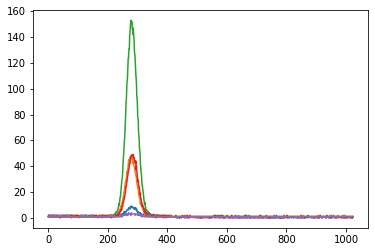

344 276
398 281
453 277
507 281
562 270


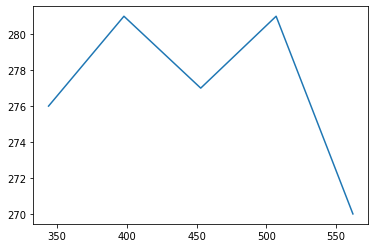

angle:  1.2690540147128428


In [4]:
calc_angle_roi(img, True)

499.98786249578956
25.408100713684583
474 627.2440501822991
499 601.0344917685416
525 573.8940119932314


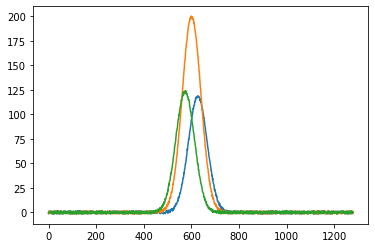

In [52]:
calc_angle_fit(img, True)

In [5]:
%timeit calc_angle_roi(img, False)

360 µs ± 6.46 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [49]:
%timeit calc_angle_fit(img, False)

5.55 ms ± 135 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
img.angle * 180 / np.pi

24.99930746591145

In [4]:
print(img.fitx.roi_sigma, img.fity.roi_sigma)
img.calc_mode_sigmas()

44.440603314243184 30.39997498566898


(42.27642370037162, 33.34411044202376)

In [10]:
func, funs = np.cos(-img.angle), np.sin(-img.angle)
sigmax = img.fitx.roi_sigma
sigmay = img.fity.roi_sigma
sigma1sqr = func**2 * sigmax**2 - funs**2 * sigmay**2
sigma2sqr = -funs**2 * sigmax**2 - func**2 * sigmay**2

In [13]:
funs**2 * sigmax**2

18.652109143039773

In [12]:
funs
print(sigma1sqr)
print(sigma2sqr)

2459.8334815144826
-431.7329598663335


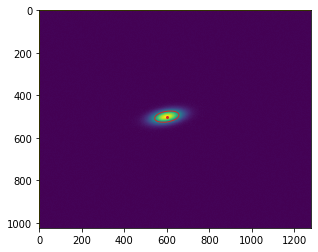

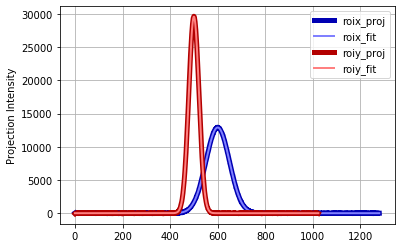

In [56]:
gauss2d, *_ = create_gauss2d(
    indcs=(1280, 1024), sigma=(50, 20), mean=(600,500), amplitude=254,
    rand_amplitude=3, angle=10, offset=0)

# data = dvf.image
data = gauss2d

sfg = images.FitGaussianScipy()
img = images.Image2D_Fit(data=data, fitgauss=sfg, roix=None)
# print(img)
img.imshow()
img.plot_projections()

In [57]:
%timeit angle = img.calc_angle_with_roi(sigma_factor=3, nrpts=5)

357 µs ± 1.99 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [59]:
angle = img.calc_angle_with_roi(sigma_factor=3, nrpts=5)
print(angle)

9.473968389324668


# Angle fit: linear, using I^n as weight

In [31]:
def create_img(angle, rand=0, online=False):

    sfg = images.FitGaussianScipy()
    
    if online:
        # real image
        data = dvf.image
        img = images.Image2D_Fit(data=data, fitgauss=sfg)
    else:
        # simulated image
        mean = (600, 500)
        sigma = (80, 20)
        data, *_ = create_gauss2d(
            indcs=(1280, 1024),
            sigma=sigma, mean=mean, amplitude=254,
            rand_amplitude=rand, angle=angle, offset=0)
        img = images.Image2D_Fit(data=data, fitgauss=sfg)
    
    fx, fy = 3, 3
    mean = img.fitx.roi_mean, img.fity.roi_mean
    sigma = img.fitx.roi_sigma, img.fity.roi_sigma
    roix = [int(mean[0] - fx*sigma[0]), int(mean[0] + fx*sigma[0])]
    roiy = [int(mean[1] - fy*sigma[1]), int(mean[1] + fy*sigma[1])]
    
    img = images.Image2D_Fit(data=data, fitgauss=sfg, roix=roix, roiy=roiy)    
    return img


def calc_angle_linear_fit(img):
    roix, roiy = img.fitx.roi, img.fity.roi
    indcsx, indcsy = img.fitx.roi_indcs, img.fity.roi_indcs
    mx, my = np.meshgrid(indcsx, indcsy)
    data = img.data[slice(*roiy), slice(*roix)]
    data = data * data
    data *= data
    mxd = mx * data
    a11 = np.sum(data)
    a12 = np.sum(mxd)
    a22 = np.sum(mx * mxd)
    b1 = np.sum(my * data)
    b2 = np.sum(my * mxd)
    a = np.array([[a11, a12], [a12, a22]])
    b = np.array([b1, b2])
    v = np.linalg.solve(a, b)
    angle = np.arctan(v[1]) * 180 / np.pi
    angle *= -1  # sign change due to the dir of vertical pixel increase
    return angle

def calc_angle_linear_fit2(img, order=1):
    roix, roiy = img.fitx.roi, img.fity.roi
    indcsx, indcsy = img.fitx.roi_indcs, img.fity.roi_indcs
    mx, my = np.meshgrid(indcsx, indcsy)
    data = img.data[slice(*roiy), slice(*roix)]
    data = data * data
    data *= data
    
    v = np.polynomial.polynomial.polyfit(mx.ravel(), my.ravel(), deg=1, w=data.ravel(), rcond=None)
    
    angle = np.arctan(v[1]) * 180 / np.pi
    angle *= -1  # sign change due to the dir of vertical pixel increase
    return angle


def calc_angle_gauss_fit(img, sigma_factor=3):     
    """."""
#     sigma_factor = 3
    nrpts = 5
    # generate posx grid
    cx, sx = img.fitx.roi_mean, img.fitx.roi_sigma
    posx = np.linspace(cx - sigma_factor*sx, cx + sigma_factor*sx, nrpts)
    posx = list(set([int(val) for val in posx]))
    posx = np.sort(posx)
    
    images1droi = [images.Image1D_ROI(data=img.data[:, val]) for val in posx]
    posy = [image.roi_center for image in images1droi]
    
    pfit = np.polynomial.polynomial.polyfit(posx, posy, 1)
    angle = - np.arctan(pfit[1]) # sign due to vertical dir pixel increase
    angle *= 180 / np.pi
    
    return angle

In [3]:
dvf = DVF(DVF.DEVICES.CAX_DVF2)

dvf.wait_for_connection()
dvf.connected

True

In [24]:
plt.imshow(dvf.image)

In [32]:
img = create_img(angle=40, rand=0, online=False)

# img.imshow(color_axes='blue', cropx=[200, 900], cropy=[300, 700]) # cropx=img.fitx.roi, cropy=img.fity.roi)
img.imshow(color_axes='blue') # , cropx=img.fitx.roi, cropy=img.fity.roi)

print(img.angle)
print(calc_angle_gauss_fit(img, sigma_factor=3))
print(calc_angle_linear_fit(img))
print(calc_angle_linear_fit2(img))

36.997945518174284
37.03588933953471
36.997945518174284
36.997945995828935


In [5]:
plt.imshow(img.data)

In [27]:
print(img)

sizey           : 1024
sizex           : 1280
intensity_min   : -2146011519
intensity_max   : 2105606144
intensity_avg   : -544536.5797981262
intensity_sum   : -713734985873
saturation_val  : 255
saturated       : True
--- fitx ---
size            : 1280
intensity_min   : 1428
intensity_max   : 25096809212
intensity_avg   : 907966224.4867188
intensity_sum   : 1162196767343
saturation_val  : 255
saturated       : False
roi             : [358, 585]
roi_center      : 473
roi_fwhm        : 43
roi_amplitude   : 24869076594.728214
roi_mean        : 472.9578105718326
roi_sigma       : 18.675370805444462
roi_fit_err     : nan %
roi_amplitude   : 24869076594.728214
roi_mean        : 472.9578105718326
roi_sigma       : 18.675370805444462
roi_fit_err     : nan %
--- fity ---
size            : 1024
intensity_min   : 1634
intensity_max   : 49254872310
intensity_avg   : 1134957780.6083984
intensity_sum   : 1162196767343
saturation_val  : 255
saturated       : False
roi             : [228, 342]
roi_c

In [5]:
import matplotlib
matplotlib.__version__

'3.1.2'

In [15]:
angle = -10

angles_gauss, angles_linear1, angles_linear2, angles_linear4 = [], [], [], []
for _ in range(50):
    img = create_img(angle, rand=0, online=False)
    angles_gauss.append(calc_angle_gauss_fit(img))
    angles_linear1.append(calc_angle_linear_fit(img, 1))
    angles_linear2.append(calc_angle_linear_fit(img, 2))
    angles_linear4.append(calc_angle_linear_fit(img, 4))

In [16]:
plt.axhline(y=angle, color='k')
plt.plot(angles_gauss, label='gauss')
plt.plot(angles_linear1, label='linear I¹')
plt.plot(angles_linear2, label='linear I²')
plt.plot(angles_linear4, label='linear I⁴')
plt.xlabel('run #')
plt.ylabel('Fitted angle [deg]')
plt.title(f'Fit for angle {angle} deg')
plt.legend()

In [32]:
angle = -10

angles_gauss, angles_linear1, angles_linear2, angles_linear4 = [], [], [], []
for _ in range(50):
    img = create_img(angle, 3)
    angles_gauss.append(calc_angle_gauss_fit(img))
    angles_linear1.append(calc_angle_linear_fit(img, 1))
    angles_linear2.append(calc_angle_linear_fit(img, 2))
    angles_linear4.append(calc_angle_linear_fit(img, 4))

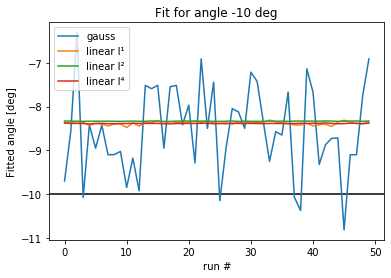

In [40]:
plt.axhline(y=angle, color='k')
plt.plot(angles_gauss, label='gauss')
plt.plot(angles_linear1, label='linear I¹')
plt.plot(angles_linear2, label='linear I²')
plt.plot(angles_linear4, label='linear I⁴')
plt.xlabel('run #')
plt.ylabel('Fitted angle [deg]')
plt.title(f'Fit for angle {angle} deg')
plt.legend()

In [41]:
angle = -45

angles_gauss, angles_linear1, angles_linear2, angles_linear4 = [], [], [], []
for _ in range(50):
    img = create_img(angle, 3)
    angles_gauss.append(calc_angle_gauss_fit(img))
    angles_linear1.append(calc_angle_linear_fit(img, 1))
    angles_linear2.append(calc_angle_linear_fit(img, 2))
    angles_linear4.append(calc_angle_linear_fit(img, 4))

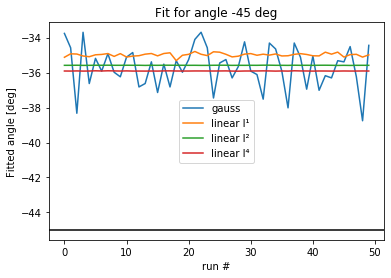

In [42]:
plt.axhline(y=angle, color='k')
plt.plot(angles_gauss, label='gauss')
plt.plot(angles_linear1, label='linear I¹')
plt.plot(angles_linear2, label='linear I²')
plt.plot(angles_linear4, label='linear I⁴')
plt.xlabel('run #')
plt.ylabel('Fitted angle [deg]')
plt.title(f'Fit for angle {angle} deg')
plt.legend()

In [207]:
%timeit calc_angle_gauss_fit(img)

362 µs ± 1.25 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [34]:
%timeit calc_angle_linear_fit(img)

730 µs ± 5.29 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [33]:
%timeit calc_angle_linear_fit2(img)

3.37 ms ± 82.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Image2D_Fit

In [2]:
from mathphys.functions import save_pickle, load_pickle

# save_pickle(data, 'img.pickle')
# data = load_pickle('img.pickle')
# plt.imshow(data)

sizey           : 1024
sizex           : 1280
intensity_min   : 0
intensity_max   : 59
intensity_avg   : 1.0241897583007813
intensity_sum   : 1342426
saturation_val  : 255
saturated       : False
--- fitx ---
size            : 1280
intensity_min   : 781
intensity_max   : 3305
intensity_avg   : 1048.7703125
intensity_sum   : 1342426
saturation_val  : 255
saturated       : False
roi             : [0, 1280]
roi_center      : 633
roi_fwhm        : 78
roi_amplitude   : 2370.4169248267417
roi_mean        : 631.8179839269106
roi_sigma       : 33.416244157393066
roi_fit_err     : 3.6692537436008585 %
roi_amplitude   : 2370.4169248267417
roi_mean        : 631.8179839269106
roi_sigma       : 33.416244157393066
roi_fit_err     : 3.6692537436008585 %
--- fity ---
size            : 1024
intensity_min   : 832
intensity_max   : 5731
intensity_avg   : 1310.962890625
intensity_sum   : 1342426
saturation_val  : 255
saturated       : False
roi             : [0, 1024]
roi_center      : 157
roi_fwhm       

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ba4df9ac8>)

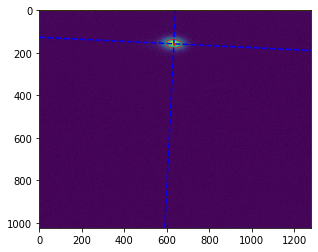

In [23]:
# gauss2d, indcsx2d, indcsy2d = create_gauss2d(rand_amplitude=0)

data = dvf.image
# data = gauss2d
fitgauss = images.FitGaussianScipy()

# img = images.Image2D_Fit(data=data, roix=[400, 800], roiy=[400, 600])
img = images.Image2D_Fit(data=data, fitgauss=fitgauss, roix=None, roiy=None)
print(img)
img.imshow()

sizey           : 1024
sizex           : 1280
intensity_min   : 0
intensity_max   : 59
intensity_avg   : 1.0241897583007813
intensity_sum   : 1342426
saturation_val  : 255
saturated       : False
--- fitx ---
size            : 1280
intensity_min   : 781
intensity_max   : 3305
intensity_avg   : 1048.7703125
intensity_sum   : 1342426
saturation_val  : 255
saturated       : False
roi             : [535, 730]
roi_center      : 633
roi_fwhm        : 78
roi_amplitude   : 2328.0365331965286
roi_mean        : 631.8766847669609
roi_sigma       : 32.175197495045616
roi_fit_err     : 1.91019752378975 %
roi_amplitude   : 2328.0365331965286
roi_mean        : 631.8766847669609
roi_sigma       : 32.175197495045616
roi_fit_err     : 1.91019752378975 %
--- fity ---
size            : 1024
intensity_min   : 832
intensity_max   : 5731
intensity_avg   : 1310.962890625
intensity_sum   : 1342426
saturation_val  : 255
saturated       : False
roi             : [105, 208]
roi_center      : 157
roi_fwhm        :

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ba4a69940>)

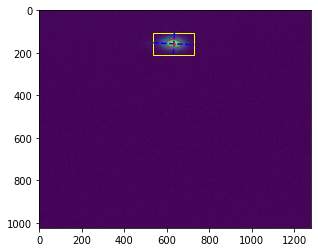

In [24]:
img.update_roi_with_fwhm(fwhmx_factor=2.5, fwhmy_factor=2.5)
print(img)
img.imshow()

1.91019752378975
1.0500993834968342


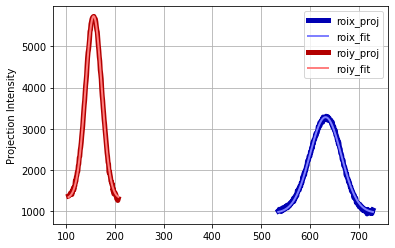

In [25]:
img.plot_projections()
print(img.fitx.roi_fit_error)
print(img.fity.roi_fit_error)

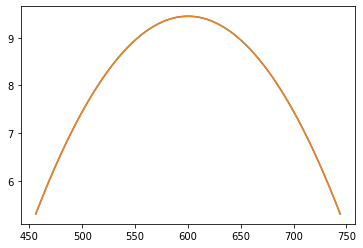

In [54]:
roi = img.fitx.roi  # [400, 800]  # img.roix
sel_roi = (roi[0] < img.fitx.roi_indcs) & (img.fitx.roi_indcs < roi[1])
sel = (img.fitx.roi_proj > 0) & sel_roi
vecx, vecy = img.fitx.roi_indcs[sel], np.log(img.fitx.roi_proj[sel])
pfit = np.polyfit(vecx, vecy, 2)
vecy_fit = np.polyval(pfit, vecx)

plt.plot(vecx, vecy, label='data')
plt.plot(vecx, vecy_fit, label='fit')

In [5]:
x0, y0 = int(img.fitx.roi_center), int(img.fity.roi_center)
sx, sy = int(1.0*img.fitx.roi_fwhm), int(1.0*img.fity.roi_fwhm)
coef = 1.0
roix = [int(x0 - coef*sx), int(x0 + coef*sx)]
roiy = [int(y0 - coef*sy), int(y0 + coef*sy)]
img.roi = [roix, roiy]

In [6]:
print(img)

sizey           : 1024
sizex           : 1280
intensity_min   : -0.9625138543409757
intensity_max   : 245.0
intensity_avg   : 1.1710776169446846
intensity_sum   : 1534954.8540817369
saturation_val  : 255
saturated       : False
--- fitx ---
size            : 1280
intensity_min   : -62.37785572471214
intensity_max   : 12284.725462913068
intensity_avg   : 1199.183479751357
intensity_sum   : 1534954.854081737
saturation_val  : 255
saturated       : False
roi             : [483, 715]
roi_center      : 599
roi_fwhm        : 116
roi_amplitude   : 12263.81889935562
roi_mean        : 599.9589677100561
roi_sigma       : 50.469537464893705
roi_fit_err     : 0.4416190068092634 %
roi_amplitude   : 12263.81889935562
roi_mean        : 599.9589677100561
roi_sigma       : 50.469537464893705
roi_fit_err     : 0.4416190068092634 %
--- fity ---
size            : 1024
intensity_min   : -73.25131342521077
intensity_max   : 30625.40948286926
intensity_avg   : 1498.9793496891966
intensity_sum   : 1534954.854

In [7]:
img.roi = [roix, roiy]

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ba48feba8>)

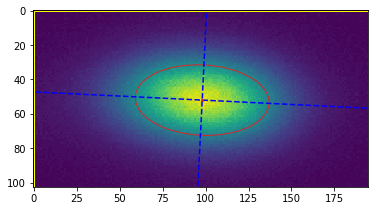

In [26]:
img.imshow(cropx=img.fitx.roi, cropy=img.fity.roi)

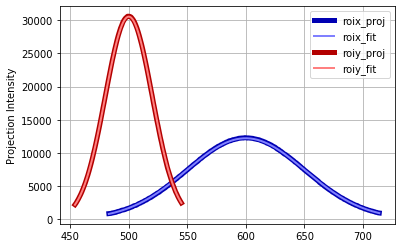

In [9]:
img.plot_projections()

In [55]:
%timeit img = images.Image2D_Fit(data=data)

3.2 ms ± 53.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Scipy.curve_fit

In [45]:
from mathphys.functions import save_pickle

save_pickle(dvf.image, 'beam_img_5')

In [14]:
from scipy.optimize import curve_fit


import numpy as np
import matplotlib.pyplot as plt

from siriuspy.devices import DVF

from mathphys import imgproc as images

In [15]:
dvf = DVF(DVF.DEVICES.CAX_DVF2)

In [16]:
sfg = images.ScipyFitGauss(scipy_curv_fit_func=curve_fit)

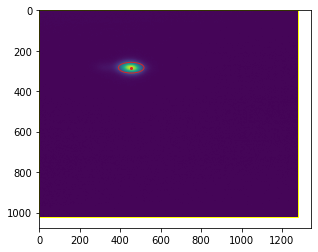

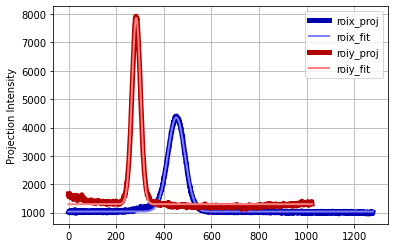

In [17]:
img = images.Image2D_Fit(data=dvf.image, curve_fit=sfg)
# print(img)
img.imshow()
img.plot_projections()

In [5]:
img.fitx.roi

[0, 1280]

In [55]:
class ScipyFitGauss(images.CurveFitGauss):
    """."""

    def __init__(self, scipy_curv_fit_func):
        """."""
        self._scipy_curve_fitfunc = scipy_curv_fit_func
       
    @staticmethod
    def fit_gaussian(x, sigma, mu, amp, offset):
        return offset + amp * np.exp(-0.5*((x - mu)/sigma)**2)
    
    def calc_fit(self, image, proj, indcs, center):
        """."""
        # get roi gaussian fit
        _np = np
        offset = image.intensity_min
        amp = image.intensity_max - image.intensity_min
        mu = image.roi_center
        sigma = image.roi_fwhm / 2.35
        p0 = (sigma, mu, amp, offset)
        param, _ = self._scipy_curve_fitfunc(ScipyFitGauss.fit_gaussian, indcs, proj, p0)
        gfit, *_ = ScipyFitGauss.fit_gaussian(indcs, *param)
        roi_gaussian_fit = gfit
        error = _np.sum((gfit - proj)**2)
        error /= _np.sum(proj**2)
        roi_gaussian_error = 100 * _np.sqrt(error)
        fit = (param, roi_gaussian_fit, roi_gaussian_error)
        return fit

In [56]:
sfg = ScipyFitGauss(scipy_curv_fit_func=curve_fit)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

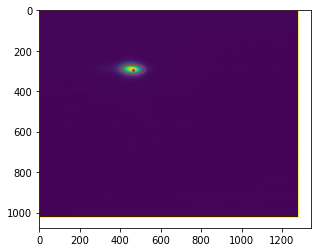

In [42]:
img = images.Image2D_ROI(data=dvf.image)
# print(img)
img.imshow()

In [57]:
image = img.imagex
proj = image.data
indcs = image.roi_indcs
center = image.roi_center

sfg.calc_fit(image, proj, indcs, center)

(array([  35.90524516,  457.89560513, 3629.31907795, 1050.13146941]),
 1050.131469407346,
 53.510900032777265)

In [34]:
def gauss(x, offset, amp, mean, sigma):
    return offset + amp * np.exp(-0.5*((x - mean)/sigma)**2)

In [36]:
p0 = (0, 4000, 450, 35)

In [38]:
x, y = img.imagex.roi_indcs, img.imagex.roi_proj
p, _ = curve_fit(gauss, x, y , p0)
yfit = gauss(x, *p)

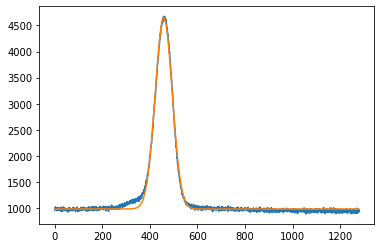

In [39]:
plt.plot(x, y)
plt.plot(x, yfit)
plt.show()

In [71]:
print(img)

sizey           : 1024
sizex           : 1280
intensity_min   : 0
intensity_max   : 105
intensity_avg   : 1.2360107421875
intensity_sum   : 1620064
saturated       : False
roiy            : [197, 345]
roix            : [274, 598]
roiy_center     : 272
roix_center     : 436
roiy_fwhm       : 37
roix_fwhm       : 81
roiy_sigma      : 27.54266219650197
roix_sigma      : 62.504422945912005
roiy_mean       : 271.95580204262967
roix_mean       : 429.3134707636719
roiy_amplitude  : 4658.488918410126
roix_amplitude  : 2046.4641107258974
roiy_gauss_err  : 42.51819850708045 %
roix_gauss_err  : 45.52227850679792 %


# Bigaussian fit

In [22]:
# scipy.optimize.least_squares(
#   fun, x0, jac='2-point', bounds=(-inf, inf), method='trf',
#   ftol=1e-08, xtol=1e-08, gtol=1e-08, x_scale=1.0, loss='linear',
#   f_scale=1.0, diff_step=None, tr_solver=None, tr_options={},
#   jac_sparsity=None, max_nfev=None, verbose=0, args=(), kwargs={})

from scipy.optimize import least_squares

In [24]:
angle_model = 5
data, indcsx, indcsy = create_gauss2d(
    indcs=(1280, 1024), sigma=(50, 20), mean=(600,500),
    amplitude=254, rand_amplitude=0, angle=angle_model)

img = images.Image2D_Fit(data=data, roix=[400, 800], roiy=[400, 600])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd8676ac0b8>)

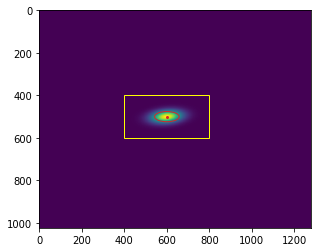

In [25]:
img.imshow()

In [26]:
def func(params):

    sigmax, meanx, sigmay, meany, amplitude, offset, angle = params
    
#     angle = params[0]
#     meanx = img.fitx.roi_mean
#     sigmax = img.fitx.roi_sigma
#     meany = img.fity.roi_mean
#     sigmay = img.fity.roi_sigma
#     amplitude = img.intensity_max - img.intensity_min
#     offset = img.intensity_min

    imgc, indcsx, indcsy = create_gauss2d(
        indcs=(img.data.shape[1], img.data.shape[0]), sigma=(sigmax, sigmay), mean=(meanx, meany), offset=offset,
        amplitude=amplitude, rand_amplitude=3, angle=angle)
    
    roix, roiy = img.fitx.roi, img.fity.roi 
    imgm = img.data[slice(*roiy), slice(*roix)]
    imgc = imgc[slice(*roiy), slice(*roix)]
    
#     imgm = img.data

#     print(imgm.shape)
#     print(imgc.shape)
#     plt.imshow(imgm)
#     plt.imshow(imgc)
    
    res = np.sum((imgm - imgc)**2)
#     print(type(res))
    
    return res

In [27]:
meanx = img.fitx.roi_mean
sigmax = img.fitx.roi_sigma
meany = img.fity.roi_mean
sigmay = img.fity.roi_sigma
amplitude = img.intensity_max - img.intensity_min
offset = img.intensity_min
angle = img.angle

params0 = sigmax, meanx, sigmay, meany, amplitude, offset, angle
# params0 = angle,

In [28]:
func(params0)

155243.74816558542

In [29]:
least_squares(func, params0, max_nfev=30)

 active_mask: array([0., 0., 0., 0., 0., 0., 0.])
        cost: 11907567751.804827
         fun: array([154321.53285789])
        grad: array([4.23682897e+14, 1.15753337e+13, 5.98474203e+14, 1.83950048e+13,
       1.10952508e+14, 1.64810517e+16, 6.12948938e+15])
         jac: array([[2.74545548e+09, 7.50078974e+07, 3.87809913e+09, 1.19199210e+08,
        7.18969710e+08, 1.06796837e+11, 3.97189509e+10]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 16
        njev: 3
  optimality: 1.6481051662425834e+16
      status: 3
     success: True
           x: array([4.98429865e+01, 6.00000079e+02, 2.03960333e+01, 5.00000104e+02,
       2.54000338e+02, 4.42974347e-02, 4.23454130e+00])

In [35]:
angle_model

0.03490658503988659

In [28]:
%timeit least_squares(func, params0)

1.37 s ± 372 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Test normal axes sigma

In [14]:
angle_model = -3
data, indcsx, indcsy = create_gauss2d(
    indcs=(1280, 1024), sigma=(50, 20), mean=(600,500),
    amplitude=254, rand_amplitude=0, angle=angle_model)

# data =dvf.image
img = images.Image2D_Fit(data=data)
# img = images.Image2D_Fit(data=data, roix=[400, 800], roiy=[400, 600])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

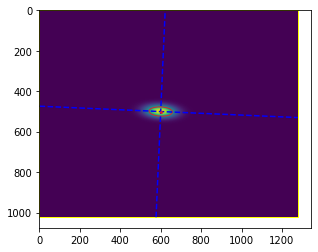

In [15]:
img.imshow()

In [16]:
print(img)

sizey           : 1024
sizex           : 1280
intensity_min   : 3.800880803869145e-193
intensity_max   : 254.0
intensity_avg   : 1.2175972503842276
intensity_sum   : 1595929.0680236148
saturation_val  : 255
saturated       : False
--- fitx ---
size            : 1280
intensity_min   : 9.280941566283626e-37
intensity_max   : 12748.345802741465
intensity_avg   : 1246.819584393449
intensity_sum   : 1595929.0680236148
saturation_val  : 255
saturated       : False
roi             : [0, 1280]
roi_center      : 600
roi_fwhm        : 116
roi_amplitude   : 12820.912696058467
roi_mean        : 599.9715018927178
roi_sigma       : 49.934552408109965
roi_fit_err     : 0.5628455893902241 %
roi_amplitude   : 12820.912696058467
roi_mean        : 599.9715018927178
roi_sigma       : 49.934552408109965
roi_fit_err     : 0.5628455893902241 %
--- fity ---
size            : 1024
intensity_min   : 1.3021054627310663e-142
intensity_max   : 31607.730296304006
intensity_avg   : 1558.5244804918116
intensity_sum  

In [17]:
x0, y0 = int(img.fitx.roi_center), int(img.fity.roi_center)
sx, sy = int(1.0*img.fitx.roi_fwhm), int(1.0*img.fity.roi_fwhm)

coef = 5.0

roix = [int(x0 - coef*sx), int(x0 + coef*sx)]
roiy = [int(y0 - coef*sy), int(y0 + coef*sy)]
img.roi = [roix, roiy]

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

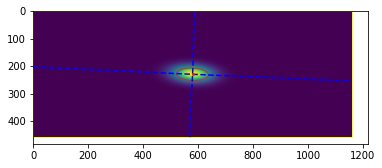

In [18]:
img.imshow(cropx=img.fitx.roi, cropy=img.fity.roi)

In [19]:
print(img)

sizey           : 1024
sizex           : 1280
intensity_min   : 3.800880803869145e-193
intensity_max   : 254.0
intensity_avg   : 1.2175972503842276
intensity_sum   : 1595929.0680236148
saturation_val  : 255
saturated       : False
--- fitx ---
size            : 1280
intensity_min   : 9.280941566283626e-37
intensity_max   : 12748.345802741465
intensity_avg   : 1246.819584393449
intensity_sum   : 1595929.0680236148
saturation_val  : 255
saturated       : False
roi             : [20, 1180]
roi_center      : 600
roi_fwhm        : 116
roi_amplitude   : 12748.345802743248
roi_mean        : 600.0000000000002
roi_sigma       : 49.942446777632554
roi_fit_err     : 1.377543392286419e-11 %
roi_amplitude   : 12748.345802743248
roi_mean        : 600.0000000000002
roi_sigma       : 49.942446777632554
roi_fit_err     : 1.377543392286419e-11 %
--- fity ---
size            : 1024
intensity_min   : 1.3021054627310663e-142
intensity_max   : 31607.730296304006
intensity_avg   : 1558.5244804918116
intensit

In [29]:
print(img.angle)
print(img.fitx.roi_sigma, img.fity.roi_sigma)
img.calc_mode_sigmas()

-2.656398916345097
263.94002483077566 119.35631821584731


(263.94002483077566, 118.8544467509608)

In [35]:
def calc_mode_sigmas(img, angle=None):
        """."""
        # method:
        #
        # [x, y] = R(-angle) [u1, u2]
        #
        # R(-angle) = [[C, S], [-S, C]]
        #
        # sigmax² = C² sigma1² + S² sigma2²
        # sigmay² = S² sigma1² + C² sigma2²
        
        _np = np
        
        sigmax = img.fitx.roi_sigma
        sigmay = img.fity.roi_sigma
        
        print(sigmax, sigmay)
        
        if angle is None:
            angle = img.angle
            
        angle *= - np.pi / 180
            
        sigma_max = max(sigmax, sigmay)
        func, funs = _np.cos(angle), _np.sin(angle)

        det = func**2 - funs**2
#         print(det)
        
        sigma1sqr = 1/det * (func**2 * sigmax**2 - funs**2 * sigmay**2)
        sigma2sqr = 1/det * (-funs**2 * sigmax**2 + func**2 * sigmay**2)
        
#         print(sigma1sqr, sigma2sqr)

        sigma1 = _np.sqrt(sigma1sqr)
        sigma2 = _np.sqrt(sigma2sqr)
        
        return sigma1, sigma2
    
    
def get_sigmaxy(sigma1, sigma2, angle):
    func, funs = np.cos(angle), np.sin(angle)
    sigmax = np.sqrt((func*sigma1)**2 + (funs*sigma2)**2)
    sigmay = np.sqrt((funs*sigma1)**2 + (func*sigma2)**2)
    return sigmax, sigmay

In [50]:
print(img.angle)
calc_mode_sigmas(img, -10)

-2.519572129150374
49.942446777632554 20.143286967704967


(50.60894683804515, 18.404741235450523)

In [42]:
calc_mode_sigmas(img, angle=-3)

49.942446777632554 20.143286967704967


(49.99999999999974, 19.999999999999996)